In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = '../input/cell-images-parasitized-or-not/cell_images'
print(os.listdir(data_dir))

['test', 'train']


In [3]:
test_path =  data_dir + '/test/'
train_path = data_dir + '/train'

In [4]:
print(os.listdir(test_path))
print(os.listdir(train_path))

['uninfected', 'parasitized']
['uninfected', 'parasitized']


In [5]:
parasitized_path_cell = train_path + '/parasitized/'
uninfected_path_cell = train_path + '/uninfected/'

In [6]:
os.listdir(parasitized_path_cell)[0]

'C99P60ThinF_IMG_20150918_141001_cell_93.png'

In [7]:
from matplotlib.image import imread

In [8]:
para = parasitized_path_cell + os.listdir(parasitized_path_cell)[150]

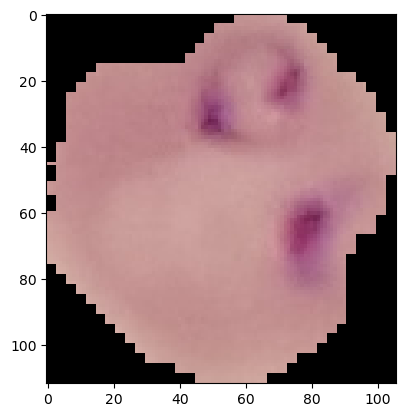

In [9]:
plt.imshow(imread(para))

In [10]:
os.listdir(uninfected_path_cell)[0]

'C203ThinF_IMG_20151029_102123_cell_51.png'

In [11]:
un = uninfected_path_cell+'C203ThinF_IMG_20151029_102123_cell_51.png'

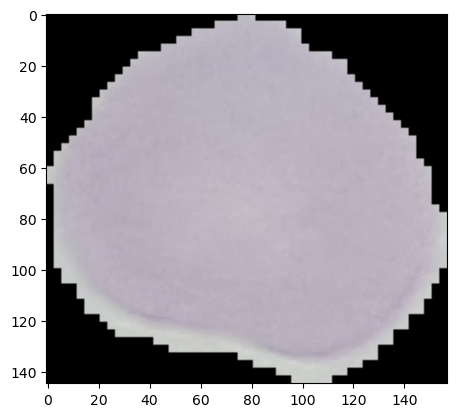

In [12]:
plt.imshow(imread(un))

Check the size of parasitized and uninfected data

In [13]:
len(os.listdir(parasitized_path_cell))


12480

In [14]:
len(os.listdir(uninfected_path_cell))

12480

Check the size of the image in the dataset by checking dimensions

In [15]:
dimension_1 = []
dimension_2 = []

for image in os.listdir(test_path+'parasitized'):
    img = imread(test_path + 'parasitized/'+image)
    d1,d2,color = img.shape
    dimension_1.append(d1)
    dimension_2.append(d2)
    


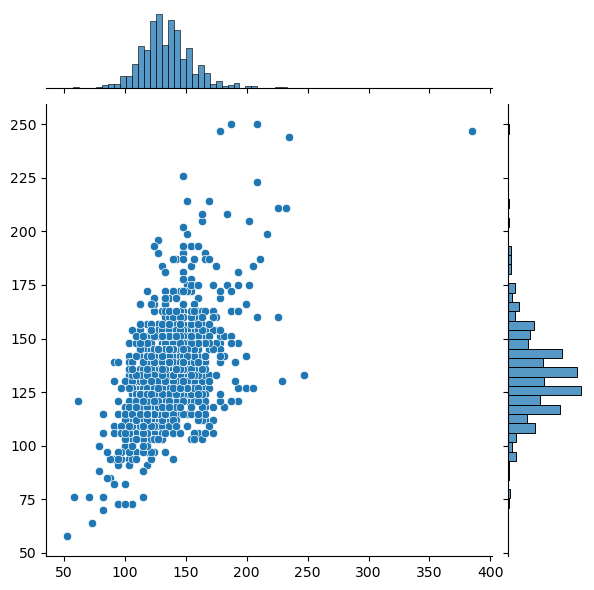

In [16]:
# visualize the size difference
sns.jointplot(x = dimension_1,y = dimension_2)

Take the average dimension

In [17]:
np.mean(dimension_1)

134.64307692307693

In [18]:
np.mean(dimension_2)

133.31846153846155

In [19]:
image_shape = (134,134,3)

#process the image in order to fit the dimension and set the datapoint

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
generator = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                               shear_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest',
                              rescale=1/255)

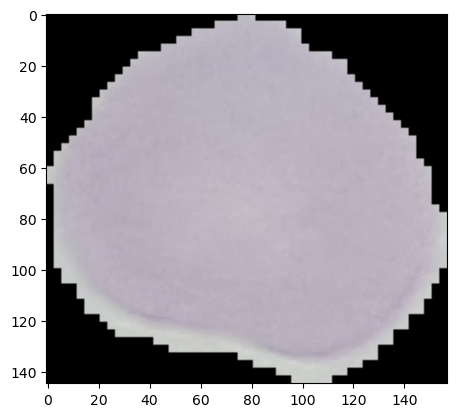

In [22]:
uninfected_image_read = imread(un)
plt.imshow(uninfected_image_read)

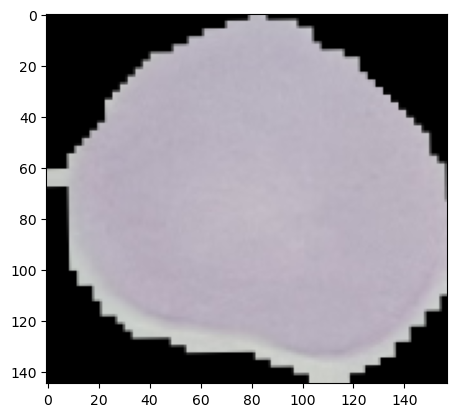

In [23]:
plt.imshow(generator.random_transform(uninfected_image_read))

In [24]:
generator.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [25]:
generator.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


CNN

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [27]:
model_set = Sequential()

model_set.add(Conv2D(filters=32,kernel_size=(3,3),input_shape = image_shape, activation='relu'))
model_set.add(MaxPool2D(pool_size=(2,2)))



model_set.add(Conv2D(filters=64,kernel_size=(3,3),input_shape = image_shape, activation='relu'))
model_set.add(MaxPool2D(pool_size=(2,2)))

model_set.add(Conv2D(filters=64,kernel_size=(3,3),input_shape = image_shape, activation='relu'))
model_set.add(MaxPool2D(pool_size=(2,2)))


model_set.add(Flatten())

model_set.add(Dense(128,activation='relu'))
model_set.add(Dropout(rate=0.5))


model_set.add(Dense(1,activation='sigmoid'))

model_set.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])




In [28]:
model_set.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 132, 132, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 66, 66, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor = 'val_loss',patience=5,verbose=1)

In [31]:
image_shape[:2]

(134, 134)

In [32]:
train_img_gen = generator.flow_from_directory(train_path,target_size=[134,134],
                                             color_mode='rgb',batch_size= 20,
                                             class_mode='binary') 

Found 24958 images belonging to 2 classes.


In [33]:
test_img_gen = generator.flow_from_directory(test_path,target_size=[134,134],
                                             color_mode='rgb',batch_size=20,
                                             class_mode='binary',shuffle=False) 

Found 2600 images belonging to 2 classes.


In [34]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [35]:
results = model_set.fit(train_img_gen,epochs=10,
                             validation_data=test_img_gen,
                             callbacks=[early_stop],
                                 validation_steps=32,
                                 steps_per_epoch=30,
                                 verbose=1)

Epoch 1/10
30/30 [==============================] - 20s 633ms/step - loss: 0.7279 - accuracy: 0.5133 - val_loss: 0.6803 - val_accuracy: 1.0000
Epoch 2/10
30/30 [==============================] - 18s 608ms/step - loss: 0.6933 - accuracy: 0.5100 - val_loss: 0.6569 - val_accuracy: 0.7781
Epoch 3/10
30/30 [==============================] - 18s 608ms/step - loss: 0.6904 - accuracy: 0.5600 - val_loss: 0.6259 - val_accuracy: 0.7844
Epoch 4/10
30/30 [==============================] - 19s 619ms/step - loss: 0.6789 - accuracy: 0.5567 - val_loss: 0.6135 - val_accuracy: 0.6672
Epoch 5/10
30/30 [==============================] - 18s 613ms/step - loss: 0.6941 - accuracy: 0.5283 - val_loss: 0.7078 - val_accuracy: 0.0156
Epoch 6/10
30/30 [==============================] - 19s 619ms/step - loss: 0.6827 - accuracy: 0.6000 - val_loss: 0.7708 - val_accuracy: 0.0063
Epoch 7/10
30/30 [==============================] - 18s 614ms/step - loss: 0.6939 - accuracy: 0.5083 - val_loss: 0.6208 - val_accuracy: 0.7203

In [36]:
losses = pd.DataFrame(model_set.history.history)

<AxesSubplot:>

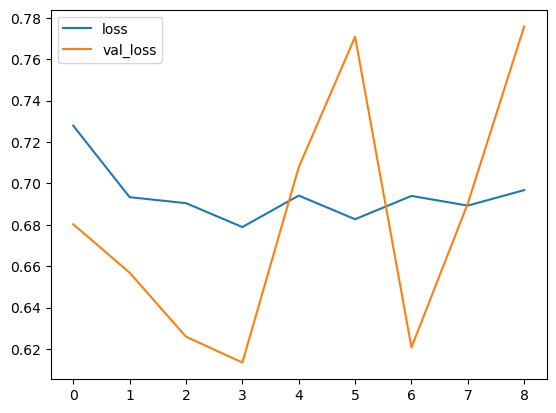

In [37]:
losses[['loss','val_loss']].plot()

In [38]:
model_set.evaluate(test_img_gen)

130/130 [==============================] - 32s 244ms/step - loss: 0.6909 - accuracy: 0.5069


[0.6909192204475403, 0.5069230794906616]

In [39]:
model_set.metrics_names

['loss', 'accuracy']

In [40]:
pred = model_set.predict(test_img_gen)

130/130 [==============================] - 25s 192ms/step


In [41]:
prediction = pred > 0.50
prediction

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [42]:
len(pred)

2600

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
test_img_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [45]:
print(classification_report(test_img_gen.classes,prediction))

              precision    recall  f1-score   support

           0       0.56      0.12      0.20      1300
           1       0.51      0.90      0.65      1300

    accuracy                           0.51      2600
   macro avg       0.53      0.51      0.43      2600
weighted avg       0.53      0.51      0.43      2600



In [46]:
confusion_matrix(test_img_gen.classes,prediction)

array([[ 162, 1138],
       [ 127, 1173]])

In [47]:
from tensorflow.keras.preprocessing import image

In [48]:
test_img = image.load_img(para,target_size=image_shape)

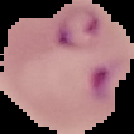

In [49]:
test_img

In [50]:
model_set.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 132, 132, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 66, 66, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0

In [51]:
test_img_arr = image.img_to_array(test_img)

In [52]:
test_img_arr.shape

(134, 134, 3)

In [53]:
test_md = np.expand_dims(test_img_arr,axis=0)

In [54]:
test_md.shape

(1, 134, 134, 3)

In [55]:
model_set.predict(test_md)

1/1 [==============================] - 0s 91ms/step


array([[1.]], dtype=float32)